## A Study of My Daily Steps Over a One Month Period


By Akshay Ramasubramanian

### Introduction

The topic for this project is analyzing the daily number of steps I've taken over the course of one month. This data is from September 3rd, 2021 to October 3rd, 2021 and is collected from my Fitbit watch. The number of steps is not completely accurate, as it only collects data when I am wearing the watch. So, on days where my watch is out of charge or I don't go outside it will not collect steps. However, for the most part the data is accurate and it will be used to discover any trends and compared to the average daily steps of a college student.

### Results


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# The data from the Fitbit app is stored in two text files, one for the integer values and one for the string values 
y = np.loadtxt("BonusProject_Data.txt",dtype='int')
data = np.loadtxt("BonusProject_Data2.txt",dtype='str')

# The day number (from 1 to 31) is stored in the "x" variable which will be used later in graphing 
x = np.arange(1,32,1)
# The days and dates are stored in arrays for the table
dates_data = data[:,0]
days_data = data[:,1]

# Display the data in a table using pd.DataFrame
data_table = {'Date': dates_data, 'Day': days_data, 'Steps': y}

pd.DataFrame(data_table, index=x)

# As seen in Day 20 and 31, the number of steps is very low which is likely not accurate. On these days either my watch was
# out of charge or I didn't leave the house; in either case I wasn't wearing the watch so steps were not collected. 

,Date,Day,Steps
1,09-03,Sunday,15305
2,09-04,Monday,7500
3,09-05,Tuesday,6825
4,09-06,Wednesday,9992
5,09-07,Thursday,16425
6,09-08,Friday,10418
7,09-09,Saturday,8170
8,09-10,Sunday,6755
9,09-11,Monday,2586
10,09-12,Tuesday,3184


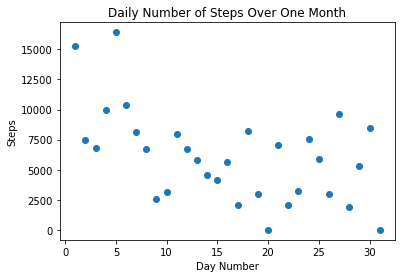

In [57]:
# The data will now be presented in a scatter plot using matplotlib.pyplot, with the x-axis being the day number and the 
# y-axis being the number of steps.
plt.scatter(x, y)
plt.title("Daily Number of Steps Over One Month")
plt.xlabel("Day Number")
plt.ylabel("Steps")
plt.show()

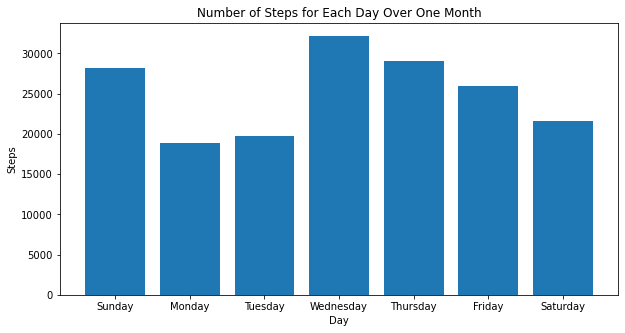

In [66]:
# For further analysis, the number of steps has been organized based on the day as well to identify any trends in the data.
# To make sure each day of the week is evenly counted, the last three days of the data were omitted so each day of the week
# was counted four times.
sunday = 0
monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
index = 0 

for i in range(4): # A nested for loop is used to add the number of steps to each variable corresponding to the day of the  
    for j in range(7):
        if j==0:
            sunday += y[index]
        if j==1:
            monday += y[index]
        if j==2:
            tuesday += y[index]
        if j==3:
            wednesday += y[index]
        if j==4:
            thursday += y[index]
        if j==5:
            friday += y[index]
        if j==6:
            saturday += y[index]
        index += 1

day_steps = [sunday, monday, tuesday, wednesday, thursday, friday, saturday]
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Now we display the data in a bar graph using matplotlib.pyplot
plt.figure(figsize=(10,5))
plt.bar(days, day_steps)
plt.title("Number of Steps for Each Day Over One Month")
plt.xlabel("Day")
plt.ylabel("Steps")
plt.show()

### Analysis

Based on the scatter plot, there doesn't seem to be any general trends in the number of steps over a month, as some days there are more steps and some days there aren't. Hence, the data was organized based on the day of the week to see if there are any patterns. The day with the most amount of steps is Wednesday, which coincides with the day I had a lecture and lab to attend every week. The day with the least amount of steps is Monday, which makes sense because I had only one lecture that day which I sometimes missed after sleeping in. Other than that, the steps on the other days of the week matched roughly with my schedule at the time, and looking back the only way I was getting steps was going to class or to the gym. 

The next thing to analyze is the comparing average daily number of steps to that of a normal college student. According to the American Journal of Health Education, the average daily steps based on a study for a sample of college students is 11,473 +/- 2978 steps. This number can be compared to my average steps and see if there is a significant difference.  

In [60]:
import scipy.stats as stats

# We must first check if the data set are normally distributed using the Normalcy Test
statSteps, pNormSteps = stats.normaltest(y)

if pNormSteps > 0.05:
    print("We confirm the data IS distributed normally with a p-value of", pNormSteps)
else:
    print("We confirm the data is NOT distributed normally with a p-value of", pNormSteps)

We confirm the data IS distributed normally with a p-value of 0.07093438963888939


In [67]:
# Now that it is confirmed data set is normally distributed, we can use the One-Sample t-Test to compare the mean to the
# average value and see if there is a significant difference

tSteps, pValSteps = stats.ttest_1samp(a = y, popmean = 11473)

if pValSteps < 0.05:
    print("The null hypothesis is rejected as p < 0.05 and the average daily steps is significantly different than 11,473.")
else:
    print("The null hypothesis is accepted as p > 0.05 and the average daily steps is similar to 11,473.")

print("The mean of the data set is", np.mean(y))

# Since the mean of the data set is 6109 steps and the test concludes the daily steps is significantly different than 
# 11,473, we can conclude that my daily steps over September 2021 is significantly less than the average person.

The null hypothesis is rejected as p < 0.05 and the average daily steps is significantly different than 11,473.
The mean of the data set is 6108.870967741936


### Conclusion

Overall, the data of my daily steps over a span of one month shows no general trends but some patterns based on the day of the week corresponding to my schedule. On busier days with classes and meeting up with friends, I had a higher step count compared to days where I was just at home. Furthermore, my average daily steps was significantly less than the average for a normal college student, which was likely due to most of my classes still being online and not having enough opportunities to go outside. Nevertheless, after this study I realized that I should try improving my lifestyle by going outside more, even if it is easier said than done. 

### References

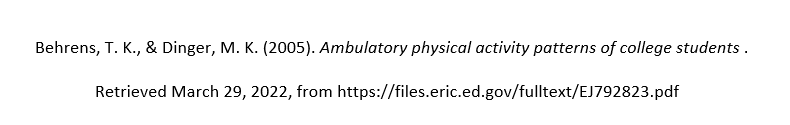
